<a href="https://colab.research.google.com/github/wakamezake/CutMix/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wakamezake/CutMix.git

Cloning into 'CutMix'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 23 (delta 8), reused 20 (delta 8), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [2]:
%cd CutMix/

/content/CutMix


In [3]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2019-07-15 11:02:38--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M   104MB/s    in 8.0s    

2019-07-15 11:02:46 (94.5 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [4]:
!tar -xvf images.tar

Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.jpg
Images/n02085620-Chihuahua/n02085620_1205.jpg
Images/n02085620-Chihuahua/n02085620_12334.jpg
Images/n02085620-Chihuahua/n02085620_1235.jpg
Images/n02085620-Chihuahua/n02085620_1298.jpg
Images/n02085620-Chihuahua/n02085620_13151.jpg
Images/n02085620-Chihuahua/n02085620_1321.jpg
Images/n02085620-Chihuahua/n02085620_13383.jpg
Images/n02085620-Chihuahua/n02085620_1346.jpg
Images/n02085620-Chihuahua/n02085620_14413.jpg
Images/n02085620-Chihuahua/n02085620_14516.jpg
Images/n02085620-Chihuahua/n02085620_1455.jpg
Images/n02085620-Chihuahua/n020

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

image_path = Path("Images")
dog_names = [x for x in image_path.iterdir() if x.is_dir()]

In [0]:
image_paths = list(image_path.glob("*/*.jpg"))[:10]

In [0]:
image_1 = Image.open(image_paths[0]).resize((224, 224))
image_2 = Image.open(image_paths[1]).resize((224, 224))

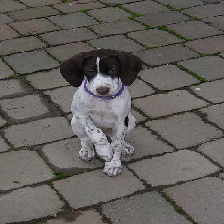

In [8]:
image_1

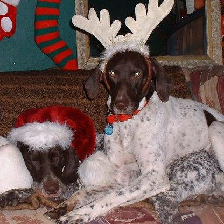

In [9]:
image_2

In [0]:
from cutout import get_rand_bbox

In [0]:
beta = 0.2
l_param  = np.random.beta(beta, beta)
img_1 = np.array(image_1)
img_2 = np.array(image_2)
bx1, by1, bx2, by2  = get_rand_bbox(img_1, l_param)

In [0]:
img_2[bx1:bx2, by1:by2, :] = img_1[bx1:bx2, by1:by2, :]

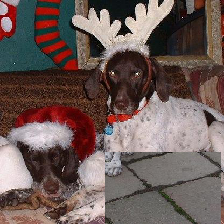

In [13]:
Image.fromarray(img_2)